# 优化与深度学习

## 优化与估计

尽管优化方法可以最小化深度学习中的损失函数值，但本质上优化方法达到的目标与深度学习的目标并不相同。
- 优化方法目标：训练集损失函数值
- 深度学习目标：测试集损失函数值（泛化性）

In [1]:
%matplotlib inline
import sys
sys.path.append('/home/kesci/input')
import d2lzh1981 as d2l
from mpl_toolkits import mplot3d # 三维画图
import numpy as np

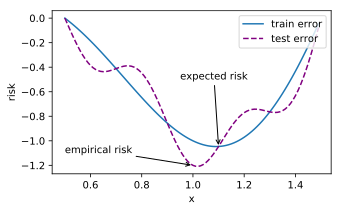

In [2]:
def f(x): return x * np.cos(np.pi * x)
def g(x): return f(x) + 0.2 * np.cos(5 * np.pi * x)

d2l.set_figsize((5, 3))
x = np.arange(0.5, 1.5, 0.01)
fig_f, = d2l.plt.plot(x, f(x),label="train error")
fig_g, = d2l.plt.plot(x, g(x),'--', c='purple', label="test error")
fig_f.axes.annotate('empirical risk', (1.0, -1.2), (0.5, -1.1),arrowprops=dict(arrowstyle='->'))
fig_g.axes.annotate('expected risk', (1.1, -1.05), (0.95, -0.5),arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('risk')
d2l.plt.legend(loc="upper right")

## 优化在深度学习中的挑战
1. 局部最小值
2. 鞍点
3. 梯度消失

### 局部最小值


$$
f(x) = x\cos \pi x
$$


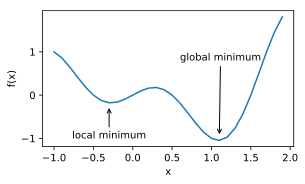

In [3]:
def f(x):
    return x * np.cos(np.pi * x)

d2l.set_figsize((4.5, 2.5))
x = np.arange(-1.0, 2.0, 0.1)
fig,  = d2l.plt.plot(x, f(x))
fig.axes.annotate('local minimum', xy=(-0.3, -0.25), xytext=(-0.77, -1.0),
                  arrowprops=dict(arrowstyle='->'))
fig.axes.annotate('global minimum', xy=(1.1, -0.95), xytext=(0.6, 0.8),
                  arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)');

### 鞍点
在鞍点 处梯度为0

In [4]:
x = np.arange(-2.0, 2.0, 0.1)
fig, = d2l.plt.plot(x, x**3)
fig.axes.annotate('saddle point', xy=(0, -0.2), xytext=(-0.52, -5.0),
                  arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)');

<Figure size 324x180 with 1 Axes>

海森矩阵： 多变量函数所有变量的二阶偏导数所组成的矩阵。
若海森矩阵的特征值全为正，那么是局部极小值点，全为负数的话那么是局部极大值点，有正有负则为鞍点
$$
A=\left[\begin{array}{cccc}{\frac{\partial^{2} f}{\partial x_{1}^{2}}} & {\frac{\partial^{2} f}{\partial x_{1} \partial x_{2}}} & {\cdots} & {\frac{\partial^{2} f}{\partial x_{1} \partial x_{n}}} \\ {\frac{\partial^{2} f}{\partial x_{2} \partial x_{1}}} & {\frac{\partial^{2} f}{\partial x_{2}^{2}}} & {\cdots} & {\frac{\partial^{2} f}{\partial x_{2} \partial x_{n}}} \\ {\vdots} & {\vdots} & {\ddots} & {\vdots} \\ {\frac{\partial^{2} f}{\partial x_{n} \partial x_{1}}} & {\frac{\partial^{2} f}{\partial x_{n} \partial x_{2}}} & {\cdots} & {\frac{\partial^{2} f}{\partial x_{n}^{2}}}\end{array}\right]
$$


e.g.

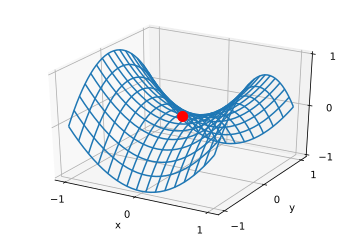

In [4]:
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j]
z = x**2 - y**2

d2l.set_figsize((6, 4))
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 2, 'cstride': 2})
ax.plot([0], [0], [0], 'ro', markersize=10)
ticks = [-1,  0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y');

### 梯度消失

Text(2,0,'vanishing gradient')

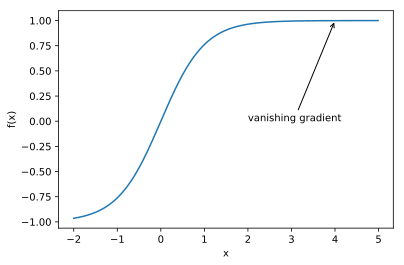

In [5]:
x = np.arange(-2.0, 5.0, 0.01)
fig, = d2l.plt.plot(x, np.tanh(x))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)')
fig.axes.annotate('vanishing gradient', (4, 1), (2, 0.0) ,arrowprops=dict(arrowstyle='->'))

# 凸性 （Convexity）

## 基础

### 集合

![Image Name](https://cdn.kesci.com/upload/image/q5p1yhqzm8.png?imageView2/0/w/640/h/640)
![Image Name](https://cdn.kesci.com/upload/image/q5p1xz9gvz.png?imageView2/0/w/640/h/640)
![Image Name](https://cdn.kesci.com/upload/image/q5p1yue9fu.png?imageView2/0/w/320/h/320)


**（1）对于集合内的任意两个点，若它们连线上所有的点都在该集合内，则称该集合为凸集合。**
**（2）两个凸集的交集也仍为凸集。**
**（3）两个凸集的并集不一定为凸集。**



### 函数


$$
\lambda f(x)+(1-\lambda) f\left(x^{\prime}\right) \geq f\left(\lambda x+(1-\lambda) x^{\prime}\right)
$$
称该函数$f(x)$为凸函数


In [10]:
def f(x):
    return 0.5 * x**2  # Convex

def g(x):
    return np.cos(np.pi * x)  # Nonconvex

def h(x):
    return np.exp(0.5 * x)  # Convex

x, segment = np.arange(-2, 2, 0.01), np.array([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))

for ax, func in zip(axes, [f, g, h]):
    ax.plot(x, func(x))
    ax.plot(segment, func(segment),'--', color="purple")
    # d2l.plt.plot([x, segment], [func(x), func(segment)], axes=ax)

<Figure size 648x216 with 3 Axes>

### Jensen 不等式


$$
\sum_{i} \alpha_{i} f\left(x_{i}\right) \geq f\left(\sum_{i} \alpha_{i} x_{i}\right) \text { and } E_{x}[f(x)] \geq f\left(E_{x}[x]\right)
$$

函数值的期望大于期望的函数值


---

## 凸函数的性质
1. 无局部极小值
2. 与凸集的关系
3. 二阶条件

###  无局部最小值

证明：假设存在 $x \in X$ 是局部最小值，则存在全局最小值 $x' \in X$, 使得 $f(x) > f(x')$, 则对 $\lambda \in(0,1]$:

$$
f(x)>\lambda f(x)+(1-\lambda) f(x^{\prime}) \geq f(\lambda x+(1-\lambda) x^{\prime})
$$

**x的任意零域上的点对应的函数值**

f(x)大于零域上的任意点对应的函数值

所以该点不是局部最小值，是全局最小值


### 与凸集的关系

对于凸函数 $f(x)$，定义集合 $S_{b}:=\{x | x \in X \text { and } f(x) \leq b\}$，则集合 $S_b$ 为凸集
 
**解析：** 若要证明集合$S_b$ 为凸集，则需要证明凸函数任意两个点的连线都在这个集合内，也就是求证 $\lambda x+(1-\lambda) x^{\prime} \in S_{b}$

也就是求证， $f\left(\lambda x+(1-\lambda) x^{\prime}\right) \leq b$。

由于f为凸函数，所以有 $f\left(\lambda x+(1-\lambda) x^{\prime}\right) \leq \lambda f(x)+(1-\lambda) f\left(x^{\prime}\right)$

又因为 $f(x) \leq b, f(x^{\prime})\leq b$

所以有 $f\left(\lambda x+(1-\lambda) x^{\prime}\right) \leq \lambda f(x)+(1-\lambda) f\left(x^{\prime}\right) \leq b$

证明：对于点 $x,x' \in S_b$, 有 $f\left(\lambda x+(1-\lambda) x^{\prime}\right) \leq \lambda f(x)+(1-\lambda) f\left(x^{\prime}\right) \leq b$, 故 $\lambda x+(1-\lambda) x^{\prime} \in S_{b}$

$f(x, y)=0.5 x^{2}+\cos (2 \pi y)$

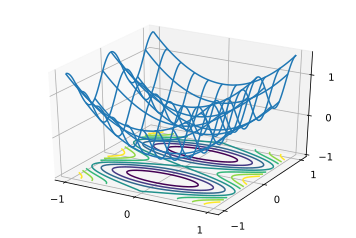

In [6]:
x, y = np.meshgrid(np.linspace(-1, 1, 101), np.linspace(-1, 1, 101),
                   indexing='ij')

z = x**2 + 0.5 * np.cos(2 * np.pi * y)

# Plot the 3D surface
d2l.set_figsize((6, 4))
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.contour(x, y, z, offset=-1)
ax.set_zlim(-1, 1.5)

# Adjust labels
for func in [d2l.plt.xticks, d2l.plt.yticks, ax.set_zticks]:
    func([-1, 0, 1])

### 凸函数与二阶导数

$f^{''}(x) \ge 0 \Longleftrightarrow f(x)$ 是凸函数

**必要性 ($\Leftarrow$):**

对于凸函数：

$$
\frac{1}{2} f(x+\epsilon)+\frac{1}{2} f(x-\epsilon) \geq f\left(\frac{x+\epsilon}{2}+\frac{x-\epsilon}{2}\right)=f(x)
$$

故:

$$
f^{\prime \prime}(x)=\lim _{\varepsilon \rightarrow 0} \frac{\frac{f(x+\epsilon) - f(x)}{\epsilon}-\frac{f(x) - f(x-\epsilon)}{\epsilon}}{\epsilon}
$$


$$
f^{\prime \prime}(x)=\lim _{\varepsilon \rightarrow 0} \frac{f(x+\epsilon)+f(x-\epsilon)-2 f(x)}{\epsilon^{2}} \geq 0
$$


**充分性 ($\Rightarrow$):**

令 $a < x < b$ 为 $f(x)$ 上的三个点，由拉格朗日中值定理:

$$
\begin{array}{l}{f(x)-f(a)=(x-a) f^{\prime}(\alpha) \text { for some } \alpha \in[a, x] \text { and }} \\ {f(b)-f(x)=(b-x) f^{\prime}(\beta) \text { for some } \beta \in[x, b]}\end{array}
$$

**拉格朗日中值定理描述的是：曲线上的两个点A，B之间存在某个点的斜率等于AB连线的斜率**


由于$f^{''}(x) \ge 0$, 根据单调性，有 $f^{\prime}(\beta) \geq f^{\prime}(\alpha)$, 故:

$$
\begin{aligned} f(b)-f(a) &=f(b)-f(x)+f(x)-f(a) \\ &=(b-x) f^{\prime}(\beta)+(x-a) f^{\prime}(\alpha) \\& \geq (b-x) f^{\prime}(\alpha)+(x-a) f^{\prime}(\alpha)\\ & = (b-a) f^{\prime}(\alpha) \end{aligned}
$$

**结束得有点草率，怎么证明了f(x)是凸函数了呢？？？**

Text(-1.5,0.125,'x')

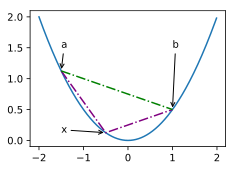

In [9]:
def f(x):
    return 0.5 * x**2

x = np.arange(-2, 2, 0.01)
axb, ab = np.array([-1.5, -0.5, 1]), np.array([-1.5, 1])

d2l.set_figsize((3.5, 2.5))
fig_x, = d2l.plt.plot(x, f(x))
fig_axb, = d2l.plt.plot(axb, f(axb), '-.',color="purple")
fig_ab, = d2l.plt.plot(ab, f(ab),'g-.')

fig_x.axes.annotate('a', (-1.5, f(-1.5)), (-1.5, 1.5),arrowprops=dict(arrowstyle='->'))
fig_x.axes.annotate('b', (1, f(1)), (1, 1.5),arrowprops=dict(arrowstyle='->'))
fig_x.axes.annotate('x', (-0.5, f(-0.5)), (-1.5, f(-0.5)),arrowprops=dict(arrowstyle='->'))

## 限制条件


$$
\begin{array}{l}{\underset{\mathbf{x}}{\operatorname{minimize}} f(\mathbf{x})} \\ {\text { subject to } c_{i}(\mathbf{x}) \leq 0 \text { for all } i \in\{1, \ldots, N\}}\end{array}
$$


### 拉格朗日乘子法
[Boyd & Vandenberghe, 2004](https://d2l.ai/chapter_references/zreferences.html#boyd-vandenberghe-2004)


$$
L(\mathbf{x}, \alpha)=f(\mathbf{x})+\sum_{i} \alpha_{i} c_{i}(\mathbf{x}) \text { where } \alpha_{i} \geq 0
$$


### 惩罚项

欲使 $c_i(x) \leq 0$, 将项 $\alpha_ic_i(x)$ 加入目标函数，如多层感知机章节中的 $\frac{\lambda}{2} ||w||^2$


**由于多层感知机，希望分类面尽可能平滑（？？？），希望权重的二范数尽可能小，所以加入惩罚项。**

### 投影


$$
\operatorname{Proj}_{X}(\mathbf{x})=\underset{\mathbf{x}^{\prime} \in X}{\operatorname{argmin}}\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|_{2}
$$



![Image Name](https://cdn.kesci.com/upload/image/q5p241skoc.png?imageView2/0/w/640/h/640)
